In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

In [9]:
data = pd.read_csv("spam.csv", encoding='ISO-8859-1')

In [58]:
data['v2']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object

Text(0, 0.5, '')

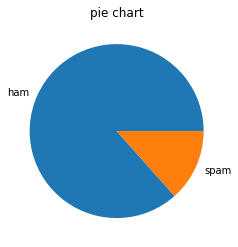

In [27]:
import pandas as pd 
import matplotlib.pyplot as plt 
target = pd.value_counts(data['v1']) 
target.plot(kind = 'pie') 
plt.title('pie chart') 
plt.ylabel('') 

In [40]:
from collections import Counter 
ham_words = Counter("".join(data[data["v1"]=='ham']['v2']).split()).most_common(20) 
df_ham_words = pd.DataFrame.from_dict(ham_words) 
df_ham_words = df_ham_words.rename(columns={0:  'words in non‐spam', 
1:'count'}) 

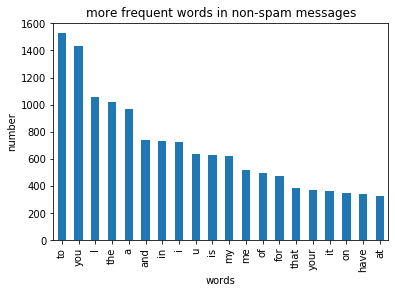

In [41]:
import numpy as np 
df_ham_words.plot.bar(legend = False) 
y_pos = np.arange(len(df_ham_words['words in non‐spam'])) 
plt.xticks(y_pos, df_ham_words['words in non‐spam']) 
plt.title('more frequent words in non‐spam messages') 
plt.xlabel('words') 
plt.ylabel('number') 
plt.show() 

In [42]:
from collections import Counter 
spam_words = Counter("".join(data[data["v1"]=='spam']['v2']).split()).most_common(20) 
df_spam_words = pd.DataFrame.from_dict(spam_words) 
df_spam_words = df_spam_words.rename(columns={0:  'words in spam', 
1:'count'}) 

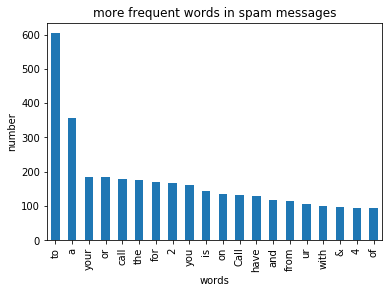

In [44]:
import numpy as np 
df_spam_words.plot.bar(legend = False) 
y_pos = np.arange(len(df_spam_words['words in spam'])) 
plt.xticks(y_pos, df_spam_words['words in spam']) 
plt.title('more frequent words in spam messages') 
plt.xlabel('words') 
plt.ylabel('number') 
plt.show() 

токенизация

In [45]:
from sklearn import feature_extraction 
tokenizer = feature_extraction.text.CountVectorizer(stop_words = 'english') 
X = tokenizer.fit_transform(data['v2']) 

разбиение выборки

In [46]:
from sklearn import model_selection 
data['v1'] = data['v1'].map({'spam':1, 'ham':0}) 
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, data['v1'], test_size = 0.33) 

In [69]:
from sklearn import metrics 
train_score = metrics.accuracy_score(y_train, clf.predict(X_train)) 
test_score = metrics.accuracy_score(y_test, y_predict) 
test_recall = metrics.recall_score(y_test, y_predict) 
test_precision = metrics.precision_score(y_test, y_predict)
print(train_score)

0.995981784087865


In [92]:
from sklearn import metrics 
alpha_range = np.arange(0.1, 20, 0.1) 
train_score, test_score, test_recall, test_precision = [], [], [], []
for i in alpha_range:
    from sklearn.naive_bayes import MultinomialNB 
    clf = MultinomialNB(alpha=i)
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    train_score.append(metrics.accuracy_score(y_train, clf.predict(X_train)))
    test_score.append(metrics.accuracy_score(y_test, y_predict))
    test_recall.append(metrics.recall_score(y_test, y_predict))
    test_precision.append(metrics.precision_score(y_test, y_predict))
    


157


In [110]:
matrix  =  np.matrix(np.c_[alpha_range,  train_score,  test_score,  test_recall, 
test_precision]) 
models = pd.DataFrame(data = matrix,  columns =  ['alpha',  'train accuracy', 
'test accuracy', 'test recall', 'test precision']) 


In [133]:
best_index = models['test precision'].idxmax() 


In [134]:
model = MultinomialNB(alpha = alpha_range[best_index]) 
model.fit(X_train, y_train) 

MultinomialNB(alpha=15.8, class_prior=None, fit_prior=True)

In [138]:
from sklearn.metrics import confusion_matrix 
confusion_matrix = confusion_matrix(y_test, model.predict(X_test)) 
pd.DataFrame(data  =  confusion_matrix,  columns  =  ['predicted  ham', 'predicted spam'], index = ['actual ham', 'actual spam']) 

,predicted ham,predicted spam
actual ham,1601,0
actual spam,44,194


In [139]:
from sklearn.metrics import roc_curve 
y_pred_pr = model.predict_proba(X_test)[:,1] 
fpr, tpr, threshold = metrics. roc_curve (y_test, y_pred_pr) 

In [140]:
from sklearn.metrics import auc 
roc_auc = metrics.auc(fpr, tpr) 

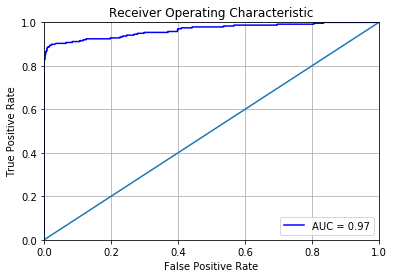

In [144]:
plt.title('Receiver Operating Characteristic') 
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc) 
plt.legend(loc = 'lower right') 
plt.plot([0, 1], [0, 1])
plt.xlim([0, 1]) 
plt.ylim([0, 1]) 
plt.ylabel('True Positive Rate') 
plt.xlabel('False Positive Rate') 
plt.grid('on') 
plt.show() 

In [145]:
from sklearn.svm import SVC 